###  Data Description


The data set contains the data of  advertisment modes in a well detailed manner that has increased the sales of a company. The modes of advertisement are TV radio newspaper and sales.

As every company aims aims to get higher sales and tries to minimize the cost, so if they invest in best advertising mode it will response in a positive manner like expense in a right direction and reaching towards the goal of highest sales.

In the above dataset the company has to predict the best advsertising mode to increase the sales so here TV, radio and newspaper are independent and sales is a dependent feild. we have to make a model which predicts the best sales

In [6]:
# importing libraries
import pandas as pd
import numpy as np

In [7]:
#loading dataset
df=pd.read_csv('advertising.csv')

In [8]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
df.shape

(200, 5)

In [10]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [11]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [12]:
df['sales'].unique

<bound method Series.unique of 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64>

In [13]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


as per the record the column named as 0 is the serial number if we remove it , it won't affect the result 

there is a huge difference betweern the 75th percentile and max of newspaper it means outliers are present

and as there is difference between mean and standard deviation it means skewness is present

In [14]:
#checking the null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

no null values are present in the dataset

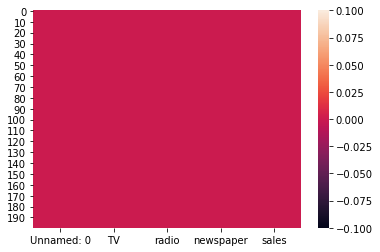

In [15]:
#visualising the null values
import seaborn as sns
sns.heatmap(df.isnull())

In [16]:
#there is no null value present

###  Visualizing   data

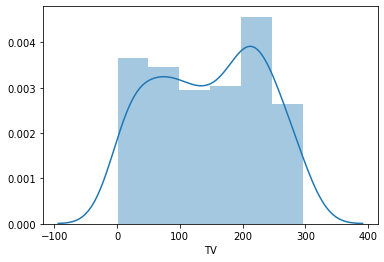

In [17]:
sns.distplot(df['TV'])

the distplot shows the performance which is quite good and some constant

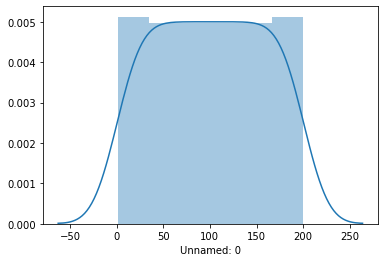

In [18]:
sns.distplot(df['Unnamed: 0'])

the column named as unknown 0 is a column comprising of record number , all the values are unique in it, we can drop this column as model learing have nothing to do with column serial numbers

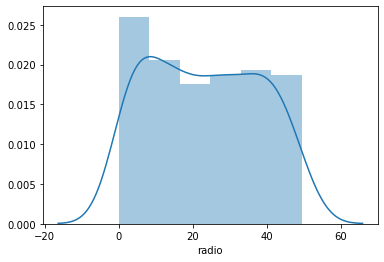

In [19]:
sns.distplot(df['radio'])

the performace of radio is very well between 0 to 50

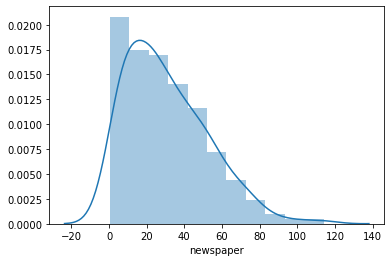

In [20]:
sns.distplot(df['newspaper'])

the newspaper plot shows that sales has reduced as the number is increased, thus showing as the presence of skewness.

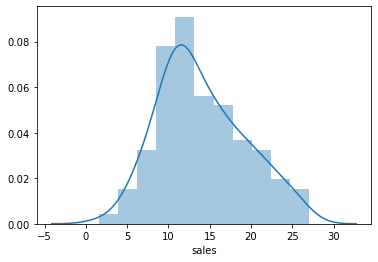

In [21]:
sns.distplot(df['sales'])

the sales shows a bell like structure, not fully but to some extent it is normally distributed

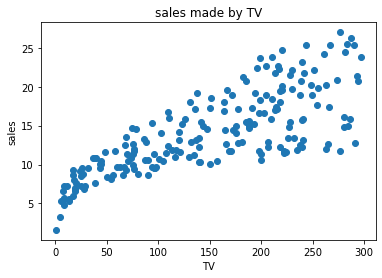

In [22]:
#bivariate analysis
import matplotlib.pyplot as plt
plt.scatter(df['TV'],df['sales'])
plt.xlabel("TV")
plt.ylabel("sales")
plt.title("sales made by TV")
plt.show()

as per the sactter plot there is  a positive linear relationship, as the number of TV advertisements are increasing so the sales are

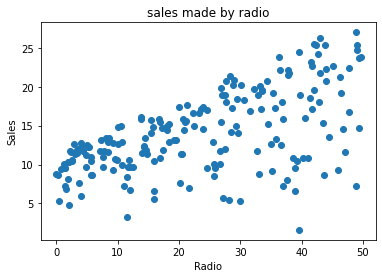

In [23]:
plt.scatter(df['radio'],df['sales'])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("sales made by radio")
plt.show()

the increase in the number of advertisement by radio results in increased number of sales

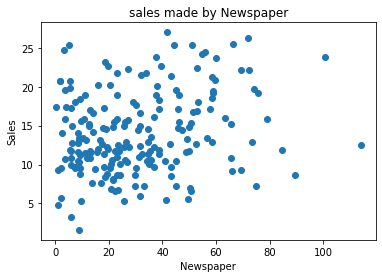

In [24]:
plt.scatter(df['newspaper'],df['sales'])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("sales made by Newspaper")
plt.show()

the sales made by newspaper is not showing any defined relation but it has performed constantly  well from 0 to 85 

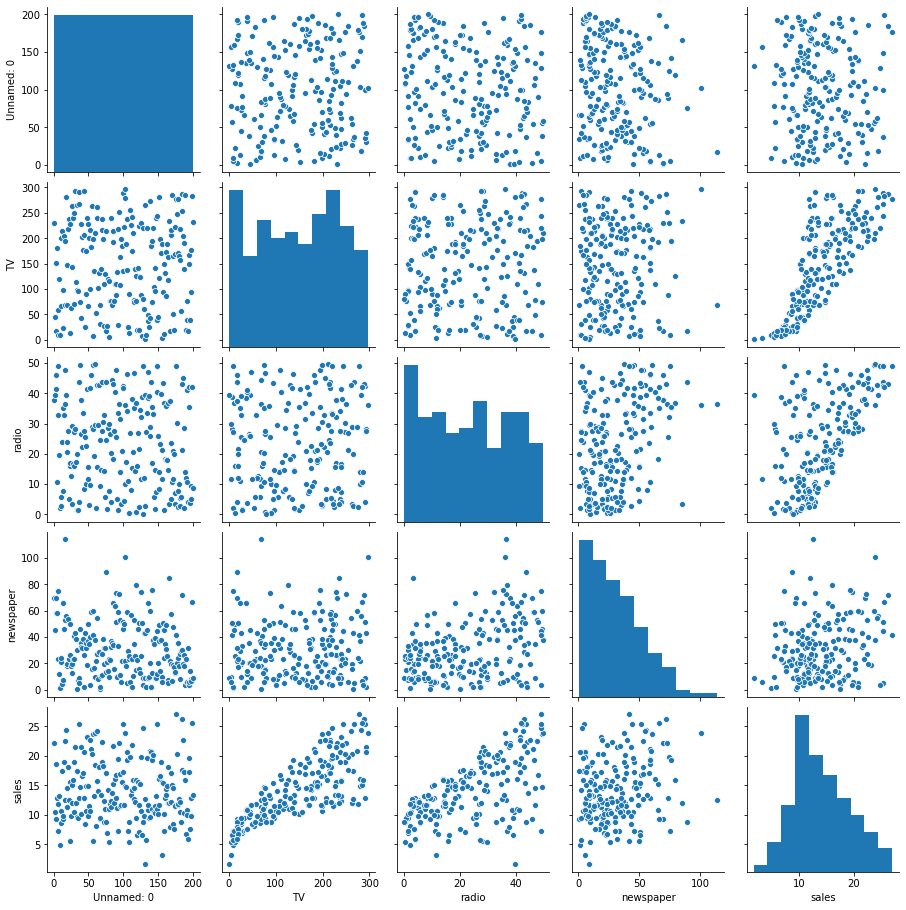

In [25]:
#multivariate analysis
sns.pairplot(df)

from the above visualizations the conclusion can be drawn that unnamed:0 column should be removed and skewness of newspaper should be treated

In [26]:
#visualization part is over

###  dropping the unnecessary column

In [27]:
#dropping the unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [28]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


###  checking Outliers and its  removal

TV              AxesSubplot(0.125,0.125;0.168478x0.755)
radio        AxesSubplot(0.327174,0.125;0.168478x0.755)
newspaper    AxesSubplot(0.529348,0.125;0.168478x0.755)
sales        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

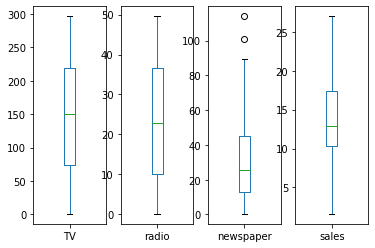

In [29]:
#checking for outliers
df.plot(kind="box",subplots=True)

visually it can be pointed out that outliers are present in newspaper and it can be the reason to skewness , so going for outlier removal

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [31]:
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


it is showing only two outliers and removing it won't affect much to our dataset

In [32]:
df_new=df[(z<3).all(axis=1)]
df_new.shape

(198, 4)

In [33]:
df=df_new

### Removing Skewness

In [34]:
# removing skewness of newspaper column
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox
df['newspaper']=boxcox(df['newspaper'])[0]

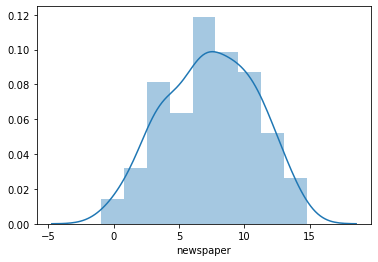

In [35]:
sns.distplot(df['newspaper'])

###  checking correlation

In [36]:
dfcor=df.corr()
dfcor

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.037738,0.779121
radio,0.051978,1.000000,0.296175,0.576748
newspaper,0.037738,0.296175,1.000000,0.190624
sales,0.779121,0.576748,0.190624,1.000000


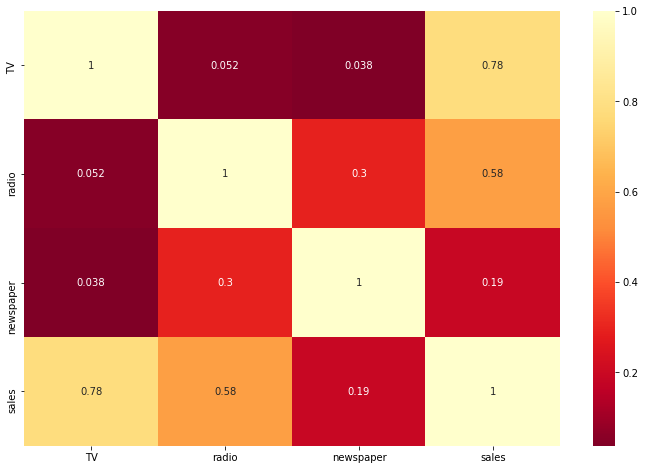

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,annot=True,cmap="YlOrRd_r")

Tv is showing high correlation with sales then radio and at last newspaper

### Separating target and feature variable

In [38]:
x=df.iloc[:,:-1]
x.head()

,TV,radio,newspaper
0,230.1,37.8,12.891654
1,44.5,39.3,10.223338
2,17.2,45.9,12.901562
3,151.5,41.3,11.782459
4,180.8,10.8,11.771592


In [39]:
y=df.iloc[:,-1]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

### Finding out the best random state

In [40]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [41]:
maxr2score=0
best_randm_state=0
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr.score(x_train,y_train)
    predlr=lr.predict(x_test)
    r2score=r2_score(y_test,predlr)
    if r2score > maxr2score:
        maxr2score=r2score
        best_random_state=i

print(f"maximum score is {maxr2score} at random state of {best_random_state}" )

maximum score is 0.9485569904332675 at random state of 444


so the maximum r2score is 0.94 at a  random state of 444 

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=444)
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
predlr=lr.predict(x_test)
print(r2_score(y_test,predlr))


0.8767976472266169
0.9485569904332675


### Cross Validation of the model

In [43]:
                # y_test,pred
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At  cross fold {j}  the cv_core is {cv_mean} ")

    print("\n")

 At  cross fold 2  the cv_core is 0.889532513149942 


 At  cross fold 3  the cv_core is 0.8889603701894943 


 At  cross fold 4  the cv_core is 0.8884456130093497 


 At  cross fold 5  the cv_core is 0.8857946247264323 


 At  cross fold 6  the cv_core is 0.8869087176504392 


 At  cross fold 7  the cv_core is 0.8840677276026649 


 At  cross fold 8  the cv_core is 0.8882998631683254 


 At  cross fold 9  the cv_core is 0.8812770321118183 




as there is no remarkable difference in cv folds , still we will go with cv =2 as its score 0.889  highest of all

here we have solved the problem of overfitting and underfitting

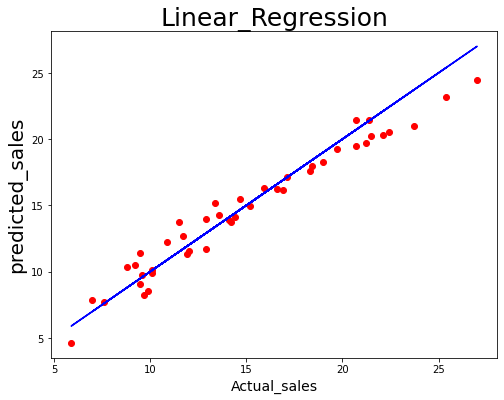

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predlr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual_sales",fontsize=14)
plt.ylabel("predicted_sales",fontsize=20)
plt.title("Linear_Regression",fontsize=25)
plt.show()

best fit line of blue color is covering max points, indicating that our model is perfect

###  Regularization

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters,cv=5)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [47]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

pred_ls = ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.9464700381396063

In [48]:
cv_score=cross_val_score(ls,x,y,cv=2)
cv_mean=cv_score.mean()
cv_mean



0.8912024271702048

### Ensemble Technique 

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt",'log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [50]:
rf=RandomForestRegressor(criterion='mae' ,max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs= r2_score(y_test,pred_rf)
print("R2_score",rfs*100)


R2_score 97.7794830015081


### Saving the model

In [55]:
import joblib
joblib.dump(clf.best_estimator_,'advertisingRFR.obj')

['advertisingRFR.obj']

In [66]:
joblib.dump(rf,'advertisingRFR.obj')

['advertisingRFR.obj']

In [67]:
result=joblib.load('advertisingRFR.obj')
print(result)
rescore=result.score(x_train,y_train)
print(rescore)

RandomForestRegressor(criterion='mae')
0.996463481204736


In [69]:
conclusion=pd.DataFrame([result.predict(x_test)[:],pred_rf[:]],index=["predicted","Original"])

In [70]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
predicted,10.309,17.827,20.418,22.044,21.253,20.096,15.996,10.049,10.415,14.663,...,13.129,7.117,8.228,7.085,12.914,18.314,7.725,13.23,14.275,11.841
Original,10.309,17.827,20.418,22.044,21.253,20.096,15.996,10.049,10.415,14.663,...,13.129,7.117,8.228,7.085,12.914,18.314,7.725,13.23,14.275,11.841


#### we can compare the predicted and original sales they are almost same as our r2_score is 99.6